In [33]:
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
breslow = np.load("D:/juju/lumc/model/data/breslow.npy")

In [3]:
fine_and_gray = np.array([0.0889104888756875, 0.014041347609817, 0.0663937915057769, \
    -0.0143795204966108, 1.3571621432417, 0.508149039892725, 0.612456746581127, \
        1.1507854793352, 1.43648085115873, -0.257561430584195, \
            -0.240799376082464, -0.000171793446414203, -0.000893179412407768, \
                -0.000870519026879657, -0.0144884589032191, -0.00306390553304349, \
                    -0.00445550621721679, -0.0128246003020665, -0.0181564617236253])

In [8]:
def MACE_risk(age, syst, gluc, chol, smoking, former_smoking, medication_gluc, medication_bp, medication_chol, income):
    x = np.array([age, syst, gluc, chol, \
        smoking, former_smoking, medication_gluc, \
            medication_bp, medication_chol, (1 if income == 1 else 0), \
                (1 if income == 2 else 0), age * syst, \
                    age * gluc, age * chol, \
                        age * smoking, age * former_smoking, \
                            age * medication_gluc, age * medication_bp, \
                                age * medication_chol])

    x = np.multiply(x, fine_and_gray)
    x = sum(x)
    #print(1-np.exp(-np.cumsum(breslow * np.exp(x)))[119])
    return 1-np.exp(-np.cumsum(breslow * np.exp(x)))[119] #119 is 10 jaar

In [16]:
MACE_risk(age=50, syst=135, gluc=5.73, chol=5.44, smoking=1, former_smoking=1, medication_gluc=1, medication_bp=1, medication_chol=1, income=2)

0.19641197284887868

In [15]:
MACE_risk(age=50, syst=135, gluc=5.73, chol=5.44, smoking=1, former_smoking=1, medication_gluc=0, medication_bp=0, medication_chol=0, income=2)

0.05108838606356925

In [51]:
result_dict = {"Fasting Blood Glucose": [], "Systolic Blood Pressure": [], "Total Cholesterol": [], "Smoker": [], "Former smoker": [], "Age": [], "Income": [], "Hypertension medication" : [], "Cholesterol medication": [], "Diabetes medication": [], "Risk": []}
for gluc in np.arange(4, 10, 0.1):
    for syst in np.arange(80, 150, 5):
        for chol in np.arange(3, 7, 0.1):
            for smoking in [0,1]:
                for former_smoking in [0,1]:
                    for age in range(15, 100):
                        for income in [1,2,3]:
                            for med_gluc in [0,1]:
                                for med_chol in [0,1]:
                                    for med_syst in [0,1]:
                                        result_dict["Fasting Blood Glucose"].append(gluc)
                                        result_dict["Systolic Blood Pressure"].append(syst)
                                        result_dict["Total Cholesterol"].append(chol)
                                        result_dict["Smoker"].append(smoking)
                                        result_dict["Former smoker"].append(former_smoking)
                                        result_dict["Age"].append(age)
                                        result_dict["Income"].append(income)
                                        result_dict["Diabetes medication"].append(med_gluc)
                                        result_dict["Hypertension medication"].append(med_syst)
                                        result_dict["Cholesterol medication"].append(med_chol)
                                        result_dict["Risk"].append(MACE_risk(age=age, syst=syst, gluc=gluc, chol=chol, smoking=smoking, former_smoking=former_smoking, medication_gluc=med_gluc, medication_bp=med_syst, medication_chol=med_chol, income=income) * 100)

In [52]:
results = pd.DataFrame.from_dict(result_dict)

In [35]:
results

,Fasting Blood Glucose,Systolic Blood Pressure,Total Cholesterol,Smoker,Former smoker,Age,Income,Medication,Risk
0,4.0,80,3.0,0,0,15,1,0,0.141051
1,4.0,80,3.0,0,0,15,1,1,2.013938
2,4.0,80,3.0,0,0,15,2,0,0.143434
3,4.0,80,3.0,0,0,15,2,1,2.047629
4,4.0,80,3.0,0,0,15,3,0,0.182450
...,...,...,...,...,...,...,...,...,...
68543995,9.9,145,6.9,1,1,99,1,1,17.246664
68543996,9.9,145,6.9,1,1,99,2,0,23.054518
68543997,9.9,145,6.9,1,1,99,2,1,17.511043
68543998,9.9,145,6.9,1,1,99,3,0,28.353548


In [53]:
corrmat = results.corr()

In [54]:
corrmat.Risk[0:-1]

Fasting Blood Glucose      0.006840
Systolic Blood Pressure    0.046550
Total Cholesterol         -0.107423
Smoker                     0.197714
Former smoker              0.177774
Age                        0.805445
Income                     0.132622
Hypertension medication    0.146039
Cholesterol medication     0.088483
Diabetes medication        0.181099
Name: Risk, dtype: float64

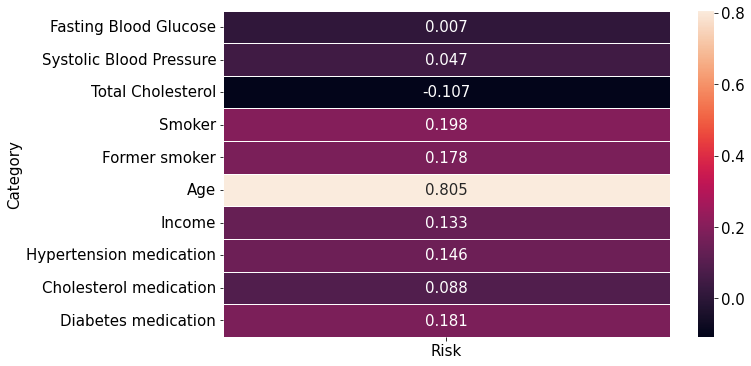

In [55]:
fig, ax = plt.subplots(1,1, figsize=(10,6))


font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('axes' , linewidth=2)
#plt.rc('text', usetex=True)
plt.rc('font', **font)

sns.heatmap(pd.DataFrame(corrmat.Risk[0:-1]), annot=True, linewidths=.5, fmt= '.3f',ax=ax)

# ax.set_xlim(2020,2020+len(experiments))
#ax.set_xticks( range(0, mace_events_long.cols.max(), 4))
#ax.set_xticklabels(range(2020, 2020 + mace_events_long.cols.max(), 4))
#plt.xticks(rotation=90)
plt.ylabel('Category')
#plt.xlabel('Age (year)')

plt.savefig("D:/juju/lumc/msc_thesis/report/images/fine_and_gray_sensitivity.png", format="png",  dpi=300, bbox_inches='tight')
plt.show()



In [66]:
no_smoking = []
smoking = []
for i in range(15, 100):
    no_smoking.append(MACE_risk(age=i, syst=110, gluc=5.73, chol=5.44, smoking=0, former_smoking=0, medication_gluc=0, medication_bp=0, medication_chol=0, income=2) * 100)
    smoking.append(MACE_risk(age=i, syst=160, gluc=9, chol=5.44, smoking=1, former_smoking=1, medication_gluc=1, medication_bp=1, medication_chol=0, income=2) * 100)

In [90]:
(smoking[45-15])/no_smoking[45-25]

19.970701951426417

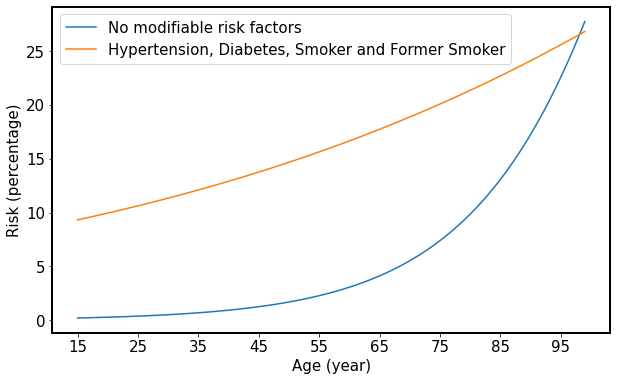

In [81]:
fig, ax = plt.subplots(1,1, figsize=(10,6))


font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('axes' , linewidth=2)
#plt.rc('text', usetex=True)
plt.rc('font', **font)


sns.lineplot(data=no_smoking, ax=ax, label="No modifiable risk factors")
sns.lineplot(data=smoking, ax=ax, label="Hypertension, Diabetes, Smoker and Former Smoker")

#ax.set_xlim(15,100)
ax.set_xticks(range(0, 100-15, 10), range(15, 101, 10))
#ax.set_xticklabels(range(2020, 2020 + mace_events_long.cols.max(), 4))
#plt.xticks(rotation=90)
plt.legend()
plt.ylabel('Risk (percentage)')
plt.xlabel('Age (year)')

plt.savefig("D:/juju/lumc/msc_thesis/report/images/fine_and_gray_multiple.png", format="png",  dpi=300, bbox_inches='tight')
plt.show()

